In [3]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
#import cudf
import numpy as np

In [4]:
df=pd.read_csv('filtered_trips.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641773 entries, 0 to 641772
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      641773 non-null  int64  
 1   checkin         641773 non-null  object 
 2   checkout        641773 non-null  object 
 3   city_id         641773 non-null  int64  
 4   booker_country  641773 non-null  object 
 5   hotel_country   641773 non-null  object 
 6   utrip_id        641773 non-null  object 
 7   checkin_month   641773 non-null  int64  
 8   checkout_month  641773 non-null  int64  
 9   checkin_day     641773 non-null  int64  
 10  checkout_day    641773 non-null  int64  
 11  trip_duration   641773 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 58.8+ MB


In [5]:
df.drop(['Unnamed: 0','checkin','checkout'], axis=1, inplace=True)

In [6]:
df['booker_country']=df['booker_country'].astype('category').cat.rename_categories(range(1, len(df['booker_country'].astype('category').cat.categories) + 1))

In [7]:
df['hotel_country']=df['hotel_country'].astype('category').cat.rename_categories(range(1, len(df['hotel_country'].astype('category').cat.categories) + 1))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641773 entries, 0 to 641772
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   city_id         641773 non-null  int64   
 1   booker_country  641773 non-null  category
 2   hotel_country   641773 non-null  category
 3   utrip_id        641773 non-null  object  
 4   checkin_month   641773 non-null  int64   
 5   checkout_month  641773 non-null  int64   
 6   checkin_day     641773 non-null  int64   
 7   checkout_day    641773 non-null  int64   
 8   trip_duration   641773 non-null  float64 
dtypes: category(2), float64(1), int64(5), object(1)
memory usage: 36.1+ MB


In [20]:
df.head()

,city_id,booker_country,hotel_country,utrip_id,checkin_month,checkout_month,checkin_day,checkout_day,trip_duration
0,8183,2,60,1000027_1,8,8,5,6,8.0
1,15626,2,60,1000027_1,8,8,6,1,8.0
2,60902,2,60,1000027_1,8,8,1,3,8.0
3,30628,2,60,1000027_1,8,8,3,6,8.0
4,38677,3,36,1000033_1,4,4,5,0,10.0


In [8]:
grouped1 = df.groupby('utrip_id')['city_id','checkin_month','checkin_day','checkout_day','hotel_country'].agg(list)

<ipython-input-8-794511ca95cf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped1 = df.groupby('utrip_id')['city_id','checkin_month','checkin_day','checkout_day','hotel_country'].agg(list)


In [9]:
grouped2 = df.groupby('utrip_id').agg({'booker_country':'first','trip_duration':'mean'})

In [10]:
grouped_df=grouped1.merge(grouped2, on='utrip_id')

In [11]:
grouped_df.reset_index(drop=True, inplace=True)

In [12]:
grouped_df

,city_id,checkin_month,checkin_day,checkout_day,hotel_country,booker_country,trip_duration
0,"[8183, 15626, 60902, 30628]","[8, 8, 8, 8]","[5, 6, 1, 3]","[6, 1, 3, 6]","[60, 60, 60, 60]",2,8.0
1,"[38677, 52089, 21328, 27485, 38677]","[4, 4, 4, 4, 4]","[5, 0, 1, 3, 5]","[0, 1, 3, 5, 1]","[36, 36, 36, 36, 36]",3,10.0
2,"[55990, 14705, 35160, 36063]","[6, 6, 6, 6]","[0, 1, 2, 3]","[1, 2, 3, 5]","[120, 120, 120, 60]",5,5.0
3,"[11306, 12096, 6761, 6779, 65690]","[7, 7, 7, 7, 7]","[0, 3, 4, 5, 0]","[3, 4, 5, 0, 2]","[77, 77, 77, 77, 77]",3,9.0
4,"[62541, 42482, 20345, 33540, 32627]","[10, 10, 10, 10, 10]","[5, 6, 1, 2, 5]","[6, 1, 2, 5, 6]","[52, 52, 52, 52, 52]",2,15.0
...,...,...,...,...,...,...,...
148151,"[4476, 1034, 64876, 9608]","[12, 12, 12, 12]","[1, 4, 3, 6]","[4, 5, 6, 2]","[60, 60, 52, 52]",5,15.0
148152,"[17775, 66634, 17775, 17775]","[3, 3, 3, 3]","[3, 4, 5, 6]","[4, 5, 6, 0]","[116, 116, 116, 116]",3,4.0
148153,"[8335, 21328, 8335, 48968]","[8, 8, 8, 8]","[4, 6, 0, 3]","[6, 0, 3, 5]","[36, 36, 36, 36]",5,8.0
148154,"[51291, 66969, 67169, 24036]","[5, 5, 5, 5]","[4, 5, 6, 0]","[5, 6, 0, 1]","[59, 59, 59, 6]",3,4.0


In [16]:
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence

In [17]:
# Preprocess the data to create input sequences and target labels
sequences = []
targets = []
destination_count=[]
for index, row in grouped_df.iterrows():
    city_id_list = row['city_id']
    destination_count.append(len(city_id_list))
    sequences.append(city_id_list[:-1])
    targets.append(city_id_list[-1])

    
max_sequence_length = max(destination_count)
#print(max_sequence_length)
# Pad the sequences with a padding token
padding_token = 0


grouped_df['city_id'] = [sequence + [padding_token] * (max_sequence_length - (len(sequence))) for sequence in sequences]
grouped_df['target_city'] = targets
grouped_df['destination_count']=destination_count

In [103]:
columns_to_pad=['checkin_month','checkin_day','checkout_day','hotel_country']
for col in columns_to_pad:
    grouped_df[col] = grouped_df[col].apply(lambda x: x + [padding_token] * (max_sequence_length - len(x)))

In [104]:
grouped_df

,city_id,checkin_month,checkin_day,checkout_day,hotel_country,booker_country,trip_duration,trip_duration_scaled,target_city,destination_count
0,"[8183, 15626, 60902, 0, 0]","[8, 8, 8, 8, 0]","[5, 6, 1, 3, 0]","[6, 1, 3, 6, 0]","[60, 60, 60, 60, 0]",2,8.0,0.042735,30628,4
1,"[38677, 52089, 21328, 27485, 0]","[4, 4, 4, 4, 4]","[5, 0, 1, 3, 5]","[0, 1, 3, 5, 1]","[36, 36, 36, 36, 36]",3,10.0,0.059829,38677,5
2,"[55990, 14705, 35160, 0, 0]","[6, 6, 6, 6, 0]","[0, 1, 2, 3, 0]","[1, 2, 3, 5, 0]","[120, 120, 120, 60, 0]",5,5.0,0.017094,36063,4
3,"[11306, 12096, 6761, 6779, 0]","[7, 7, 7, 7, 7]","[0, 3, 4, 5, 0]","[3, 4, 5, 0, 2]","[77, 77, 77, 77, 77]",3,9.0,0.051282,65690,5
4,"[62541, 42482, 20345, 33540, 0]","[10, 10, 10, 10, 10]","[5, 6, 1, 2, 5]","[6, 1, 2, 5, 6]","[52, 52, 52, 52, 52]",2,15.0,0.102564,32627,5
...,...,...,...,...,...,...,...,...,...,...
148151,"[4476, 1034, 64876, 0, 0]","[12, 12, 12, 12, 0]","[1, 4, 3, 6, 0]","[4, 5, 6, 2, 0]","[60, 60, 52, 52, 0]",5,15.0,0.102564,9608,4
148152,"[17775, 66634, 17775, 0, 0]","[3, 3, 3, 3, 0]","[3, 4, 5, 6, 0]","[4, 5, 6, 0, 0]","[116, 116, 116, 116, 0]",3,4.0,0.008547,17775,4
148153,"[8335, 21328, 8335, 0, 0]","[8, 8, 8, 8, 0]","[4, 6, 0, 3, 0]","[6, 0, 3, 5, 0]","[36, 36, 36, 36, 0]",5,8.0,0.042735,48968,4
148154,"[51291, 66969, 67169, 0, 0]","[5, 5, 5, 5, 0]","[4, 5, 6, 0, 0]","[5, 6, 0, 1, 0]","[59, 59, 59, 6, 0]",3,4.0,0.008547,24036,4


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scale=MinMaxScaler()

In [15]:
grouped_df['trip_duration_scaled']=scale.fit_transform(grouped_df['trip_duration'].to_numpy().reshape(-1, 1))

In [18]:
grouped_df

,city_id,checkin_month,checkin_day,checkout_day,hotel_country,booker_country,trip_duration,trip_duration_scaled,target_city,destination_count
0,"[8183, 15626, 60902, 0, 0]","[8, 8, 8, 8]","[5, 6, 1, 3]","[6, 1, 3, 6]","[60, 60, 60, 60]",2,8.0,0.042735,30628,4
1,"[38677, 52089, 21328, 27485, 0]","[4, 4, 4, 4, 4]","[5, 0, 1, 3, 5]","[0, 1, 3, 5, 1]","[36, 36, 36, 36, 36]",3,10.0,0.059829,38677,5
2,"[55990, 14705, 35160, 0, 0]","[6, 6, 6, 6]","[0, 1, 2, 3]","[1, 2, 3, 5]","[120, 120, 120, 60]",5,5.0,0.017094,36063,4
3,"[11306, 12096, 6761, 6779, 0]","[7, 7, 7, 7, 7]","[0, 3, 4, 5, 0]","[3, 4, 5, 0, 2]","[77, 77, 77, 77, 77]",3,9.0,0.051282,65690,5
4,"[62541, 42482, 20345, 33540, 0]","[10, 10, 10, 10, 10]","[5, 6, 1, 2, 5]","[6, 1, 2, 5, 6]","[52, 52, 52, 52, 52]",2,15.0,0.102564,32627,5
...,...,...,...,...,...,...,...,...,...,...
148151,"[4476, 1034, 64876, 0, 0]","[12, 12, 12, 12]","[1, 4, 3, 6]","[4, 5, 6, 2]","[60, 60, 52, 52]",5,15.0,0.102564,9608,4
148152,"[17775, 66634, 17775, 0, 0]","[3, 3, 3, 3]","[3, 4, 5, 6]","[4, 5, 6, 0]","[116, 116, 116, 116]",3,4.0,0.008547,17775,4
148153,"[8335, 21328, 8335, 0, 0]","[8, 8, 8, 8]","[4, 6, 0, 3]","[6, 0, 3, 5]","[36, 36, 36, 36]",5,8.0,0.042735,48968,4
148154,"[51291, 66969, 67169, 0, 0]","[5, 5, 5, 5]","[4, 5, 6, 0]","[5, 6, 0, 1]","[59, 59, 59, 6]",3,4.0,0.008547,24036,4


In [109]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148156 entries, 0 to 148155
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   city_id               148156 non-null  object  
 1   checkin_month         148156 non-null  object  
 2   checkin_day           148156 non-null  object  
 3   checkout_day          148156 non-null  object  
 4   hotel_country         148156 non-null  object  
 5   booker_country        148156 non-null  category
 6   trip_duration         148156 non-null  float64 
 7   target_city           148156 non-null  int64   
 8   destination_count     148156 non-null  int64   
 9   trip_duration_scaled  148156 non-null  float64 
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 10.3+ MB


In [149]:
grouped_df.to_csv('grouped.csv')

In [59]:
import numpy as np

In [29]:
# Split data into training and testing sets
train_size = int(len(grouped_df) * 0.8)
X_train, X_test = grouped_df["city_id"][:train_size], grouped_df["city_id"][train_size:]
y_train, y_test = grouped_df["target_city"][:train_size], grouped_df["target_city"][train_size:]

In [30]:
# Convert X_train and X_test to numpy arrays
X_train = np.array([np.array(l, dtype=int) for l in X_train])
X_test = np.array([np.array(l, dtype=int) for l in X_test])

In [31]:
y_train

0         30628
1         38677
2         36063
3         65690
4         32627
          ...  
118519    47499
118520    41858
118521    16151
118522    44529
118523    31444
Name: target_city, Length: 118524, dtype: int64

In [19]:
# Import itertools library
import itertools


In [20]:
# Flatten city_id-list column and find unique values
unique_city_ids = list(set(itertools.chain.from_iterable(grouped_df["city_id"])))

In [125]:



# Define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(unique_city_ids), output_dim=128, mask_zero=True))
model.add(tf.keras.layers.LSTM(units=128, return_sequences=True))
model.add(tf.keras.layers.LSTM(units=128, return_sequences=True))
model.add(tf.keras.layers.LSTM(units=128))
model.add(tf.keras.layers.Dense(units=8, activation="relu"))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)


# Define learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return 0.0001
    elif epoch < 20:
        return 0.00001
    else:
        return 0.000001

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)


# Compile model
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [82]:
# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

Epoch 1/30
463/463 [==============================] - 26s 36ms/step - loss: -113941.7812 - accuracy: 8.4371e-06 - val_loss: -504164.6562 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/30
463/463 [==============================] - 9s 20ms/step - loss: -504379.6875 - accuracy: 0.0000e+00 - val_loss: -504187.6562 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/30
463/463 [==============================] - 10s 21ms/step - loss: -504433.0000 - accuracy: 0.0000e+00 - val_loss: -504242.0312 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 4/30
463/463 [==============================] - 9s 20ms/step - loss: -504523.2812 - accuracy: 0.0000e+00 - val_loss: -504316.8750 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 5/30
463/463 [==============================] - 9s 20ms/step - loss: -504718.2188 - accuracy: 0.0000e+00 - val_loss: -504409.9062 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 6/30
463/463 [==============================] - 10s 21ms/step - loss: -505050.8438 - accurac

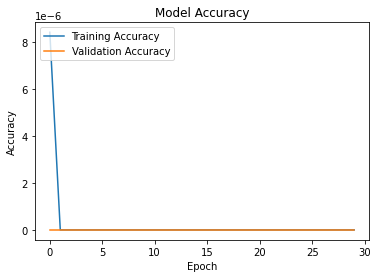

In [83]:

# Plot training and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc="upper left")
plt.show()

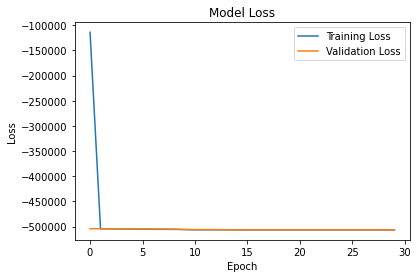

In [84]:
# Get the training and validation loss values
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]

# Plot the training and validation loss
plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [85]:
def accuracy_at_k(model, X, y, k):
    # Predict top k items
    y_pred = model.predict(X).argsort(axis=1)[:, -k:]
    y=y.to_numpy()
    # Calculate accuracy
    accuracy = 0
    for i in range(len(y_pred)):
        if y[i] in y_pred[i]:
            accuracy += 1
    accuracy /= len(y_pred)

    return accuracy

In [86]:
accat4 = accuracy_at_k(model, X_test, y_test, 4)

926/926 [==============================] - 10s 6ms/step


In [89]:
accat4

3.3747300215982723e-05

In [92]:
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
np.random.seed(0)

In [95]:
RUN_TABNET = True
max_epochs = 30

In [98]:
if RUN_TABNET:
    # TabNetPretrainer
    unsupervised_model = TabNetPretrainer(    
        n_d=32, n_a=32, n_steps=4,
        #cat_idxs=cat_idxs,
       #cat_dims=12,
       cat_emb_dim=12,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2),
        mask_type='entmax', # "sparsemax"
        device_name="auto" #"auto" "cpu" 
    )

    unsupervised_model.fit(
        X_train=X_train,
#         eval_set=[X_test.values],
        pretraining_ratio=0.35,
         max_epochs=6,
        batch_size = 512 ,# 1024 default , ~256-512 with GPU
    )
    
    ## save unsup model
    ### https://github.com/dreamquark-ai/tabnet/blob/develop/pretraining_example.ipynb
#     unsupervised_model.save_model('./.4_pretrain')

C:\ProgramData\Anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\ProgramData\Anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.33081 |  0:00:16s
epoch 1  | loss: 2.16724 |  0:00:32s
epoch 2  | loss: 1.65002 |  0:00:49s
epoch 3  | loss: 1.31639 |  0:01:06s
epoch 4  | loss: 1.1382  |  0:01:22s
epoch 5  | loss: 1.02096 |  0:01:40s


In [99]:
from __future__ import print_function, absolute_import

from pytorch_tabnet.metrics import Metric
# from sklearn.metrics import top_k_accuracy_score


__all__ = ['accuracy']

def accuracy_k(output, target, topk=(4,)): # (1,))
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [108]:
if RUN_TABNET:
    clf = TabNetClassifier(    
        n_d=32, n_a=32, n_steps=4,
        #cat_idxs=cat_idxs,
       #cat_dims=categorical_dims,
       cat_emb_dim=12,   
       optimizer_fn=torch.optim.Adam,
       optimizer_params=dict(lr=2e-2),
       scheduler_params={"step_size":50, # how to use learning rate scheduler
                         "gamma":0.9},
       scheduler_fn=torch.optim.lr_scheduler.StepLR,
#        mask_type='entmax', # "sparsemax"
        device_name="auto" #"auto" "cpu"
    )

    clf.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_train, y_train)],#(X_test, y_test)],
    #      eval_set=[(X_test.values, y_test.values)],
        eval_name=['train'],
        eval_metric=['accuracy'], # 'accuracy',
         max_epochs=max_epochs, 
        batch_size = 1024 ,# 1024 default , ~256-512 with GPU
        from_unsupervised=unsupervised_model,    
    )

#     clf.save_model('./.full_tabnet_1192class')

C:\ProgramData\Anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\ProgramData\Anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:105: UserWarning: Pretraining: mask_type changed from sparsemax to entmax
  warnings.warn(wrn_msg)
C:\ProgramData\Anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:231: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


MemoryError: Unable to allocate 6.45 GiB for an array with shape (118524, 14600) and data type float32

In [133]:
from keras.layers import Embedding, LSTM, Dense, GRU, Dropout
from keras.models import Sequential

In [122]:
from tensorflow.keras.losses import BinaryCrossentropy
loss=BinaryCrossentropy()

In [134]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=np.max(X_train), output_dim=8, input_length=X_train.shape[1]))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(GRU(16))
model.add(Dropout(rate=0.2))
model.add(Dense(8))
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

# Fit the model
#model.fit(X_train, y_train, epochs=50)

In [136]:
# Define learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return 0.00001
    elif epoch < 20:
        return 0.000001
    else:
        return 0.0001

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [137]:
# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

Epoch 1/30
463/463 [==============================] - 5s 11ms/step - loss: -483600.6875 - accuracy: 0.0000e+00 - val_loss: -506281.5312 - val_accuracy: 0.0000e+00 - lr: 1.0000e-05
Epoch 2/30
463/463 [==============================] - 5s 10ms/step - loss: -484221.0312 - accuracy: 0.0000e+00 - val_loss: -506281.5312 - val_accuracy: 0.0000e+00 - lr: 1.0000e-05
Epoch 3/30
463/463 [==============================] - 5s 10ms/step - loss: -484868.8438 - accuracy: 0.0000e+00 - val_loss: -506281.5312 - val_accuracy: 0.0000e+00 - lr: 1.0000e-05
Epoch 4/30
463/463 [==============================] - 5s 10ms/step - loss: -485452.4375 - accuracy: 8.4371e-06 - val_loss: -506281.5312 - val_accuracy: 0.0000e+00 - lr: 1.0000e-05
Epoch 5/30
463/463 [==============================] - 5s 10ms/step - loss: -486169.7812 - accuracy: 0.0000e+00 - val_loss: -506281.5312 - val_accuracy: 0.0000e+00 - lr: 1.0000e-05
Epoch 6/30
463/463 [==============================] - 5s 10ms/step - loss: -486901.4375 - accuracy: 

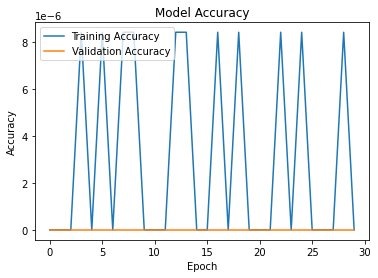

In [138]:

# Plot training and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"], loc="upper left")
plt.show()

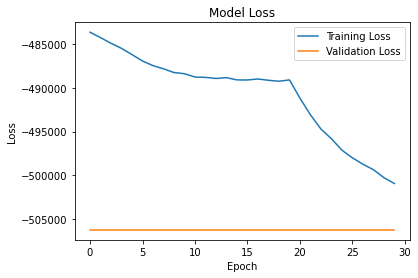

In [139]:
# Get the training and validation loss values
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]

# Plot the training and validation loss
plt.plot(train_loss, label="Training Loss")
plt.plot(valid_loss, label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [50]:
len(unique_city_ids)-1

28994

In [105]:
# Split data into training and testing sets
train_size = int(len(grouped_df) * 0.8)
X_train, X_test = grouped_df[:train_size], grouped_df[train_size:]
y_train, y_test = grouped_df["target_city"][:train_size], grouped_df["target_city"][train_size:]

In [106]:
X_train.drop(['target_city'], axis=1, inplace=True)
X_test.drop(['target_city'], axis=1, inplace=True)

C:\Users\Junaid\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [167]:
inputs = [city_id, checkin_month, checkin_day, checkout_day, 
              hotel_country, booker_country, trip_duration_scaled, destination_count]

print(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)

[<KerasTensor: shape=(None, None) dtype=int32 (created by layer 'city_id')>, <KerasTensor: shape=(None, None) dtype=int32 (created by layer 'checkin_month')>, <KerasTensor: shape=(None, None) dtype=int32 (created by layer 'checkin_day')>, <KerasTensor: shape=(None, None) dtype=int32 (created by layer 'checkout_day')>, <KerasTensor: shape=(None, None) dtype=int32 (created by layer 'hotel_country')>, <KerasTensor: shape=(None, 1) dtype=int32 (created by layer 'booker_country')>, <KerasTensor: shape=(None, 1) dtype=int32 (created by layer 'trip_duration_scaled')>, <KerasTensor: shape=(None, 1) dtype=int32 (created by layer 'destination_count')>]


In [166]:
import tensorflow as tf
from tensorflow import keras

N_CITY = len(unique_city_ids)-1
EC = 200
H=128

# Input layers
city_id = keras.layers.Input(shape=(None,), dtype='int32', name='city_id')
checkin_month = keras.layers.Input(shape=(None,), dtype='int32', name='checkin_month')
checkin_day = keras.layers.Input(shape=(None,), dtype='int32', name='checkin_day')
checkout_day = keras.layers.Input(shape=(None,), dtype='int32', name='checkout_day')
hotel_country = keras.layers.Input(shape=(None,), dtype='int32', name='hotel_country')
booker_country = keras.layers.Input(shape=(1,), dtype='int32', name='booker_country')
trip_duration_scaled = keras.layers.Input(shape=(1,), dtype='int32', name='trip_duration_scaled')
destination_count = keras.layers.Input(shape=(1,), dtype='int32', name='destination_count')

# Embedding layers
city_emb = keras.layers.Embedding(input_dim=N_CITY, output_dim=EC)(city_id)
checkin_month_emb = keras.layers.Embedding(input_dim=12, output_dim=4)(checkin_month)
checkin_day_emb = keras.layers.Embedding(input_dim=7, output_dim=3)(checkin_day)
checkout_day_emb = keras.layers.Embedding(input_dim=7, output_dim=3)(checkout_day)
hotel_country_emb = keras.layers.Embedding(input_dim=5, output_dim=2)(hotel_country)
booker_country_emb = keras.layers.Embedding(input_dim=5, output_dim=2)(booker_country)

# Concatenate embeddings
x = keras.layers.Concatenate()([city_emb, checkin_month_emb, checkin_day_emb, checkout_day_emb, hotel_country_emb, booker_country_emb])
x = keras.layers.Flatten()(x)
    
# Dense layers with batch normalization and activation
x = keras.layers.Dense(H)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dense(H)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dense(H)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

# Weighted Sum layer
   
w1 = tf.Variable(initial_value=0.5, trainable=True)
w2 = tf.Variable(initial_value=0.5, trainable=True)
x1 = keras.layers.Lambda(lambda x: x * 0)(x)
x2 = keras.layers.Lambda(lambda x: x * w1)(x)
x3 = keras.layers.Lambda(lambda x: x * w2)(x)
x = keras.layers.Add()([x1, x2, x3])
x = keras.layers.Lambda(lambda x: x/(1+w1+w2))(x)

# EmbDotSoftMax layer
emb_pred = keras.layers.Dense(EC)(x)
x = keras.layers.Softmax()(emb_pred)
x = keras.layers.Dense(8, activation='softmax')(x)

    
    # Concatenate all inputs and outputs
    #inputs = [city_id, checkin_month, checkin_day, checkout_day, hotel_country, 
              #booker_country, trip_duration_scaled, destination_count] 
    # cast inputs to float32
    #inputs = [keras.layers.Lambda(lambda x: tf.cast(x, 'float32'))(x) for x in inputs]
    #print(inputs)
    #inputs = tf.concat(inputs, axis=-1)    
inputs = [city_id, checkin_month, checkin_day, checkout_day, 
              hotel_country, booker_country, trip_duration_scaled, destination_count]

print(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
#    return model
    
   
    

The following Variables were used a Lambda layer's call (lambda_109), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (lambda_110), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (lambda_111), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is

In [70]:
import numpy

In [157]:
model = build_model()

The following Variables were used a Lambda layer's call (lambda_93), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (lambda_94), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (lambda_95), but
are not present in its tracked objects:
  <tf.Variable 'Variable:0' shape=() dtype=float32>
  <tf.Variable 'Variable:0' shape=() dtype=float32>
It is possible that this is intended behavior, but it is mo

In [161]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [111]:
X_train

,city_id,checkin_month,checkin_day,checkout_day,hotel_country,booker_country,trip_duration,trip_duration_scaled,destination_count
0,"[8183, 15626, 60902, 0, 0]","[8, 8, 8, 8, 0]","[5, 6, 1, 3, 0]","[6, 1, 3, 6, 0]","[60, 60, 60, 60, 0]",2,8.0,0.042735,4
1,"[38677, 52089, 21328, 27485, 0]","[4, 4, 4, 4, 4]","[5, 0, 1, 3, 5]","[0, 1, 3, 5, 1]","[36, 36, 36, 36, 36]",3,10.0,0.059829,5
2,"[55990, 14705, 35160, 0, 0]","[6, 6, 6, 6, 0]","[0, 1, 2, 3, 0]","[1, 2, 3, 5, 0]","[120, 120, 120, 60, 0]",5,5.0,0.017094,4
3,"[11306, 12096, 6761, 6779, 0]","[7, 7, 7, 7, 7]","[0, 3, 4, 5, 0]","[3, 4, 5, 0, 2]","[77, 77, 77, 77, 77]",3,9.0,0.051282,5
4,"[62541, 42482, 20345, 33540, 0]","[10, 10, 10, 10, 10]","[5, 6, 1, 2, 5]","[6, 1, 2, 5, 6]","[52, 52, 52, 52, 52]",2,15.0,0.102564,5
...,...,...,...,...,...,...,...,...,...
118519,"[2078, 2078, 2078, 2078, 0]","[5, 5, 5, 5, 5]","[3, 4, 5, 6, 1]","[4, 5, 6, 1, 4]","[79, 79, 79, 79, 78]",2,8.0,0.042735,5
118520,"[839, 54402, 36135, 0, 0]","[7, 7, 8, 8, 0]","[5, 6, 0, 1, 0]","[6, 0, 1, 2, 0]","[60, 60, 60, 59, 0]",3,4.0,0.008547,4
118521,"[51222, 45347, 7705, 0, 0]","[11, 11, 11, 11, 0]","[2, 3, 4, 5, 0]","[3, 4, 5, 6, 0]","[36, 36, 36, 36, 0]",2,4.0,0.008547,4
118522,"[21033, 51276, 9608, 0, 0]","[4, 4, 4, 4, 0]","[4, 5, 6, 0, 0]","[5, 6, 0, 1, 0]","[52, 52, 52, 52, 0]",3,4.0,0.008547,4


In [112]:
# Convert X_train and X_test to numpy arrays
X_train_city = ([np.array(l, dtype=int) for l in X_train["city_id"]])
X_test_city = np.array([np.array(l, dtype=int) for l in X_test["city_id"]])

X_train_cim = np.array([np.array(l, dtype=int) for l in X_train["checkin_month"]])
X_test_cim = np.array([np.array(l, dtype=int) for l in X_test["checkin_month"]])

X_train_cid = np.array([np.array(l, dtype=int) for l in X_train["checkin_day"]])
X_test_cid = np.array([np.array(l, dtype=int) for l in X_test["checkin_day"]])

X_train_cod = np.array([np.array(l, dtype=int) for l in X_train["checkout_day"]])
X_test_cod = np.array([np.array(l, dtype=int) for l in X_test["checkout_day"]])

X_train_hc = np.array([np.array(l, dtype=int) for l in X_train["hotel_country"]])
X_test_hc = np.array([np.array(l, dtype=int) for l in X_test["hotel_country"]])

In [124]:
print(numpy.array(X_train_city).shape, 
numpy.array(X_train_cim).shape, 
numpy.array(X_train_cid).shape, 
numpy.array(X_train_cod).shape, 
numpy.array(X_train_hc).shape,
numpy.array(X_train['booker_country']).reshape(-1,1).shape)

(118524, 5) (118524, 5) (118524, 5) (118524, 5) (118524, 5) (118524, 1)


In [162]:
history = model.fit(x={
"city_id": numpy.array(X_train_city),
"checkin_month": numpy.array(X_train_cim),
"checkin_day": numpy.array(X_train_cid),
"checkout_day": numpy.array(X_train_cod),
"hotel_country": numpy.array(X_train_hc),
"booker_country": numpy.array(X_train["booker_country"]).reshape(-1,1),
"trip_duration_scaled": numpy.array(X_train["trip_duration_scaled"]).reshape(-1,1),
"destination_count": numpy.array(X_train["destination_count"]).reshape(-1,1)
}, y=y_train, batch_size=32, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 3572, in concatenate
        return tf.concat([to_dense(x) for x in tensors], axis)

    ValueError: Exception encountered when calling layer "concatenate_11" "                 f"(type Concatenate).
    
    Dimension 1 in both shapes must be equal, but are 5 and 1. Shapes are [?,5] and [?,1]. for '{{node model_7/concatenate_11/concat}} = ConcatV2[N=6, T=DT_FLOAT, Tidx=DT_INT32](model_7/embedding_69/embedding_lookup/Identity_1, model_7/embedding_70/embedding_lookup/Identity_1, model_7/embedding_71/embedding_lookup/Identity_1, model_7/embedding_72/embedding_lookup/Identity_1, model_7/embedding_73/embedding_lookup/Identity_1, model_7/embedding_74/embedding_lookup/Identity_1, model_7/concatenate_11/concat/axis)' with input shapes: [?,5,200], [?,5,4], [?,5,3], [?,5,3], [?,5,2], [?,1,2], [] and with computed input tensors: input[6] = <2>.
    
    Call arguments received by layer "concatenate_11" "                 f"(type Concatenate):
      • inputs=['tf.Tensor(shape=(None, 5, 200), dtype=float32)', 'tf.Tensor(shape=(None, 5, 4), dtype=float32)', 'tf.Tensor(shape=(None, 5, 3), dtype=float32)', 'tf.Tensor(shape=(None, 5, 3), dtype=float32)', 'tf.Tensor(shape=(None, 5, 2), dtype=float32)', 'tf.Tensor(shape=(None, 1, 2), dtype=float32)']


In [ ]:
test_loss, test_acc = model.evaluate(x={"city_id": X_test["city_id"], "checkin_month": X_test["checkin_month"], "checkin_day": X_test["checkin_day"], "checkout_day": X_test["checkout_day"], "hotel_country": X_test["hotel_country"], "booker_country": X_test["booker_country"], "trip_duration": X_test["trip_duration"], "trip_duration_scaled": X_test["trip_duration_scaled"], "target_city": X_test["target_city"], "destination_count": X_test["destination_count"], "prob": X_test["prob"], "top_city_emb": X_test["top_city_emb"], "top_city_id": X_test["top_city_id"]}, y=y_test)